<a href="https://www.kaggle.com/code/megan3/ai-ethics-and-covid-19?scriptVersionId=136938758" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## AI Ethics During the Covid-19 Pandemic

March 2020 was the beginning of a test for the entire planet of humans. A novel coronavirus was discovered circulating in several areas of the world. Scientists, politicians, and medical personel sprung into action in a variety of areas to both stop the spread of the virus and aid the people already infected. Already developed techniques in artificial intelligence and machine learning were adapted to the virus dubbed COVID-19. Additionally, new techniques were devised for the new health threat. 

Natural and human-generated events can create a turning point in the evolution of society. The COVID-19 pandemic was unexpected in both magnitude and scope, and it presented new challenges for researches all over the world. I will investigate how ethics and AI are applied to COVID by looking at papers in arXiv that address those topics.

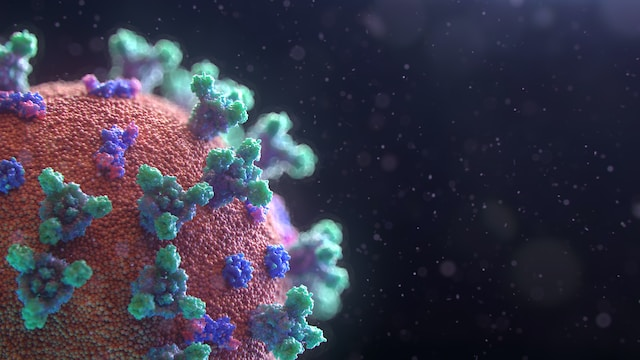

### Combining ethics of medicine and AI ethics

Ethics in medicine is a specialized and complicated matter. When addressing ethics in researching COVID-19, and using AI as a tool to do so, there are factors in both fields that need to be addressed. For example, informed consent is an important topic in medicine. A paper on AI ethics, *Artificial Intelligence: the global landscape of ethics guidelines*[10], distills down the topic of AI ethics to five main principles:  transparency, justice and fairness, non-maleficence, responsibility and privacy. Although there is considerable overlap, both AI-specific and medicine-specific ethics need to be considered. Due to the complexities, I will limit my discussion to what the paper authors cited as ethical considerations.

### Limit the articles to those with ethics and COVID in the abstract

Using the arXiv dataset provided in this challenge, I narrowed down the list of possible papers by restricting the papers to containing some variant on the word 'COVID' as well as 'ethic', such as 'ethics', 'ethical', or 'ethically' in the abstract. Once the field of papers is narrowed down, I eliminated a few where the ethical considerations were only cursorily discussed. 

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

df_arxiv = pd.read_json("/kaggle/input/2023-kaggle-ai-report/arxiv_metadata_20230510.json", 
                     lines=True,
                     convert_dates=True,
                    )
#https://stackoverflow.com/questions/12451431/loading-and-parsing-a-json-file-with-multiple-json-objects
df_arxiv.to_json('new_file.json')
df_arxiv.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
2,0704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]"
3,0704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,None,math.CO,None,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]"
4,0704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,"Illinois J. Math. 52 (2008) no.2, 681-689",None,None,math.CA math.FA,None,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]"


In [2]:
# Limit the arxiv articles to those containing words such as ethic, ethics, ethical, etc.
# Next limit the articles to those with Covid in the abstract.
meta = df_arxiv[df_arxiv['abstract'].str.contains('ethic')]
meta_covid = meta[meta['abstract'].str.contains('Covid|SARS|Corona|COVID')]

print(f"The number of articles with ethic in the abstract: {meta.shape[0]}")

print(f"The number of articles that are further restricted by Covid in the abstract: {meta_covid.shape[0]}")

The number of articles with ethic in the abstract: 1901
The number of articles that are further restricted by Covid in the abstract: 51


### Breakdown of computer science categories

To get a better idea of what kind of papers are being written on these topics, I matched up the category title with the category abbreviation. Plots of these results allows for quick readability.

'Computers and Society' overwhelmingingly has the majority of papers (31 of 51), but a couple of other interesting categories were represented. 'Computer Vision', 'Social and Information Networks' have 6 and 4 papers respectively. I decided on a total of 7 papers in these two categories to review. 


In [3]:
cs_categories = {'cs.AI':'Artificial Intelligence',
                 'cs.AR': 'Hardware Architecture',
                 'cs.CC':'Computational Complexity',
                 'cs.CE':'Computational Engineering, Finance, and Science',
                 'cs.CG':'Computational Geometry',
                 'cs.CL': 'Computation and Language',
                 'cs.CR': 'Cryptography and Security',
                 'cs.CV': 'Computer Vision and Pattern Recognition',
                 'cs.CY': 'Computers and Society',
                 'cs.SY': 'Systems and Control',
                 'cs.DC': 'Distributed, Parallel, and Cluster Computing',
                 'cs.DL': 'Digital Libraries', 
                 'cs.DM': 'Discrete Mathematics',
                 'cs.DS': 'Data Structures and Algorithms',
                 'cs.DB': 'Databases',
                 'cs.ET': 'Emerging Technologies',
                 'cs.FL': 'Formal Languages and Automata Theory',
                 'cs.GL': 'General Literature',
                 'cs.GR': 'Graphics',
                 'cs.GT': 'Computer Science and Game Theory',
                 'cs.HC': 'Human-Computer Interaction',
                 'cs.IR': 'Information Retrieval',
                 'cs.IT': 'Information Theory',
                 'cs.LG': 'Machine Learning',
                 'cs.LO': 'Logic in Computer Science',
                 'cs.MA': 'Multiagent Systems',
                 'cs.MM': 'Multimedia',
                 'cs.MS': 'Mathematical Software',
                 'cs.NA': 'Numerical Analysis',
                 'cs.NE': 'Neural and Evolutionary Computing',
                 'cs.NI': 'Networking and Internet Architecture',
                 'cs.OH': 'Other Computer Science',
                 'cs.OS': 'Operating Systems',
                 'cs.PF': 'Performance',
                 'cs.PL': 'Programming Languages',
                 'cs.RO': 'Robotics',
                 'cs.SC': 'Symbolic Computation',
                 'cs.SD': 'Sound',
                 'cs.SE': 'Software Engineering',
                 'cs.SI': 'Social and Information Networks'
                }

def count_categories(category_series):
    ''' Takes in a series of categories that are space separated.
        Returns a dictionary of the categories that are CS (computer science).
    '''
    category = []
    for x in meta_covid.categories:
        category.extend(x.split(' '))
    cat_dict = dict(Counter(category))
    return {k:v for k,v in cat_dict.items() if 'cs.' in k and 'ics.' not in k}

# Count all the categories where Covid and ethic/ethics are in the abstract.
a = count_categories(meta_covid.categories)
print("Dictionary with the count of the categories for the papers that are related to COVID-19 and discuss ethics in the abstract.")
a

Dictionary with the count of the categories for the papers that are related to COVID-19 and discuss ethics in the abstract.


{'cs.SI': 4,
 'cs.AI': 10,
 'cs.CR': 12,
 'cs.CY': 31,
 'cs.NI': 1,
 'cs.HC': 5,
 'cs.LG': 8,
 'cs.CV': 6,
 'cs.MA': 1,
 'cs.SE': 1,
 'cs.CC': 1,
 'cs.CL': 2,
 'cs.RO': 1,
 'cs.LO': 1}

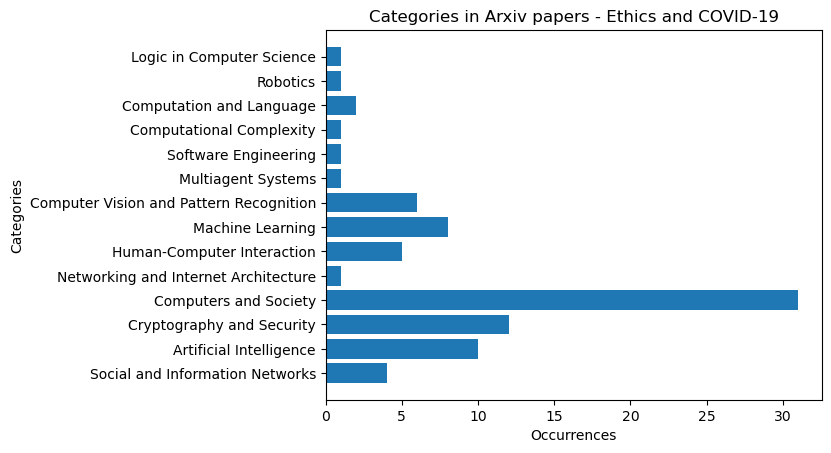

In [4]:
# Plot the category counts for the papers that are Covid-19 and Ethics related
names = [cs_categories[x] for x in a.keys()]
values = list(a.values())
fig, ax = plt.subplots()
ax.barh(names, values)
ax.set_xlabel('Occurrences')
ax.set_ylabel('Categories')
ax.set_title('Categories in Arxiv papers - Ethics and COVID-19');

## Computer vision papers

There are 6 papers that are identified as computer vision through the category cs.CV. Of these, 3 papers stand out as having detailed discussions of AI ethics and how it applies to COVID-19. Computer vision is an important technique in medicine because it can improve treatment and diagnoses, and accelerate research. AI ethics is relatively young and there is disagreement to how the five ethical principals are interpreted so it is interesting to see how the authors of the following papers tackle the topic of AI ethics as applied to their research. 

A Vision-based Social Distancing and Critical Density Detection System for COVID-19[1] investigates a computer vision-based social distancing warning system. The idea is to use a camera placed in public areas with the system identifying areas where social distancing is not properly maintained. The authors identify four ethical considerations:

*     System should only be real time - no caching or recording of video or other data
*     The warnings should be on a population, not an individual
*     The system should be fully automated so there are no humans monitoring
*     The code should be open source and available to the public

Each of these ethical considerations are designed to protect the public from government and business overreach and surveillance. 

SyntheX: Scaling Up Learning-based X-ray Image Analysis Through In Silico Experiments[2]  addresses an interesting issue in medical applications of AI. Rather than AI being the cause of the ethical dilemna, it is used to address an ethical dilemna already present in medicine. Namely, the ethics of data collection during surgeries. The authors propose a method of creating simulated data on three tasks - including detection of COVID-19 using xrays. Using open source datasets of COVID infected patients, the authors used around 150 xray and CT scans to generate nearly 20,000 simulated chest xrays for training and testing of a deep learning model. The authors published the code on Github and linked to the training data used. 

While the previous paper discussed a possible solution to the ethical issues of collecting data during surgeries, *AI Models Close to your Chest: Robust Federated Learning Strategies for Multi-site CT*[3] dives into data diversity in AI models. Data privacy laws in the US (HIPAA) and the EU (GDPR) and ethical boards can limit the ability to generalize medical machine learning models across geographies and populations. Data diversity is a problem in medicine. COVID-19's high transmissibility highlights the need for fast development and rapid deployment of models. The authors specifically perform subgroup analysis based on sex and age, and investigate methods to mitigate class imbalances. 

## Social and information network papers

Social and information networks in AI is a large category. It can mean anything from the graph theory used to model social media to social attitudes and norms. The papers that I will discuss have four very different topics. The first discusses using graph neural networks (GNN) as applied to contact tracing of COVID-19 infections. The second is a proposal for an app that holds Covid vaccine or immunity status. The third paper uses social media to monitor the deteriorating mental health due to the pandemic and the last paper discusses misinformation and social media.

*Link Prediction using Graph Neural Networks for Master Data Management* [4] discusses using Graph Neural Networks (GNN) as a possible solution to the complexity of contact tracing COVID-19 positive people. Predicting disease spread using social media, such as twitter, is not a new concept.[9] Using geotagged tweets and sampling techniques, flu incidence has been monitored. However, this is is done on a population level instead of an individual level. This paper discusses using GNN for contact tracing by using graphs where people who have tested positive were then put on a Watchlist. Additional nodes (people) are added and links (edges) to the people on the Watchlist are predicted. The authors propose this as a method of contact tracing, although they acknowledge that ethical considerations must be carefully considered, including informed consent of the participants. Additionally, explanability of the predictions. Using path-based explanations to visualize the neighborhood of the prediction requires a certain size of dataset. Provenance and lineage - where does the data come from and how was it obtained. Finally fairness, privacy, and data protection are considered along with diversity of the data sets to ensure that minority populations are also properly represented. 

*COVID-19 Antibody Test / Vaccination Certification, There’s an app for that* [5] prototypes an app that can be used to verify COVID immunity due to vaccination or tests. 

A few apps were created to address different facets of COVID management. This particular app manages test results and vaccination statuses of individuals. Because this is individual data instead of aggregate data, data privacy is key to a successful app. The authors propose the app use a 'Consortium blockchain' - a blockchain shared by a group of known providers that have signed to follow ethical guidelines. Even if the app maintains perfect privacy, authors discuss how such an app could disenfranchise populations that do not have access to the technology or "fail" the test. They are also concerned with how future governments could use this technology to discriminate based on immunity. To combat these issues, the authors recommend making use of the technology optional, adhere to the UK NHS Information Governance guidelines, and be overseen by an ethics committee. 

*Social Behavior and Mental Health: A Snapshot Survey under COVID-19 Pandemic* [6] attempts detection of mental health disorders using machine learning and deep learning techniques. It seems to be near universal consensus that the pandemic measures have negatively impacted mental health. This paper discusses other papers that use social media to detect mental disorders including PTSD and schizophrenia in the years 2020 and 2021. It surveys numerous papers that use a variety of techniques. The authors specifically mention machine learning (regression, classification and clustering, and dimension reduction), deep learning (CNN, RNN, and ensemble models), and statistical analysis. It included papers that use text-based analysis and image based analysis. Ethical challenges were discussed in length, including consulting the ethical board, informed consent, and data anonymization. Due to the extremely sensitive nature of mental health, explicit informed consent for mental health evaluation was gained in a lot of the papers surveyed. 

> Social media based mental healthcare heavily depends on NLP, ML and deep learning. Unfortunately, these computing
techniques are not fully mature for deployment in a large scale with sensitive applications like mental assessment.
Inaccurate assessment of users with a mental disorder may lead to undesirable consequences, such as false positives
where the system falsely detects inexistent mental distress and false-negative where the system misses the detection
of mentally distressed users.

False positives can have disasterous consequences if the individual is led to believe they have a mental health disorder they, in fact, do not. False negatives or failing to detect a mental health condition can also have immense consequences. Depression and anxiety have increased during the stay at home orders where it is easy to fall through the cracks and go unnoticed.

*Case Study on Detecting COVID-19 Health-Related Misinformation in Social Media*[7] uses natural language processing (NLP) on twitter content to detect health-related misinformation. The authors discuss several different ethical concerns and how they mitigated them. For privacy, they did not use the tweet author's account information in processing. They also removed any mentioned users (@username). They addressed a common form of misinformation - where information is a selective or partial truth about a controversial topic. Information is incomplete, such as in emerging news stories, can be a source of misinformation. The authors encourage labelling of such tweets as misinformation instead of censoring them so the technology won't be viewed as violating freedom of speech.

Although the 7 papers discussed use different AI technologies for different purposes, there are a number of shared ethical concerns.

## References:

### Computer vision

[1] [A Vision-based Social Distancing and Critical Density Detection System for COVID-19](https://arxiv.org/abs/2007.03578)

[2] [SyntheX: Scaling Up Learning-based X-ray Image Analysis Through In Silico Experiments](https://arxiv.org/pdf/2206.06127.pdf)

[3] [AI Models Close to your Chest: Robust Federated Learning Strategies for Multi-site CT](https://arxiv.org/pdf/2303.13567.pdf)

### Social and information network papers

[4] [Link Prediction using Graph Neural Networks for Master Data Management](https://arxiv.org/pdf/2003.04732.pdf)

[5] [COVID-19 Antibody Test / Vaccination Certification, There’s an app for that](https://arxiv.org/pdf/2004.07376.pdf)

[6] [Social Behavior and Mental Health: A Snapshot Survey under COVID-19 Pandemic](https://arxiv.org/pdf/2105.08165.pdf)

[7] [Case Study on Detecting COVID-19 Health-Related Misinformation in Social Media](https://arxiv.org/pdf/2106.06811.pdf)

### Other papers

[8] [Ethical Considerations in the Application of Artificial Intelligence to Monitor Social Media for COVID-19 Data](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9406274/)

[9] [Regional Influenza Prediction with Sampling Twitter Data and PDE Model](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7037800/)

[10] [Artificial Intelligence: the global landscape of ethics guidelines](https://arxiv.org/pdf/1906.11668.pdf)